In [2]:
import sys, math, os
from skimage import data, io, filters, color, img_as_ubyte, transform, img_as_float, util, exposure
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from collections import defaultdict
from scipy import misc

Part 1: Histogram Equalization

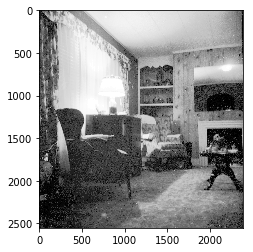

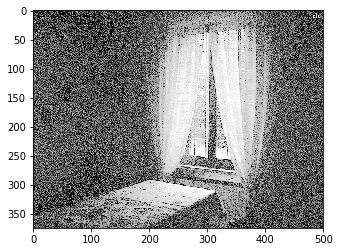

In [9]:
def histogramEqualization(im):
    if len(im.shape) != 2:
        im = im[:,:,0]
    freqs = [0 for _ in range(256)]
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            freqs[im[i, j]] += 1
    total_pixels = sum(freqs)
    histogram = [(freq * 1.)/total_pixels for freq in freqs]
    cumul_p = [sum(histogram[:(i + 1)]) for i in range(len(histogram))]
    im_new = np.zeros(im.shape, dtype=np.uint8)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            im_new[i, j] = int(math.floor(255.0 * cumul_p[im[i, j]]))
    return im_new

he = imread('./A1_resources/Q5/hist_equal.jpg')
eq_he = histogramEqualization(he)
plt.figure()
plt.imshow(eq_he, cmap = "gray")

he2 = io.imread('./A1_resources/Q5/hist_equal2.jpg')
eq_he2 = histogramEqualization(he2)
plt.figure()
plt.imshow(eq_he2, cmap = "gray")

Part 2: Local Histogram Equalization

In [4]:
def LocHistEq(im, c):
    im = im if len(im.shape) == 2 else im[:,:,0]
    padding = int((c - 1)/2)
    im = util.pad(im, padding, mode='edge')
    new_im = np.zeros(im.shape, dtype=np.uint8)
    for i in range(padding, im.shape[0] - padding):
        for j in range(padding, im.shape[1] - padding):
            eq_window = histogramEqualization(im[i - padding:i + padding + 1, j - padding: j + padding + 1])
            new_im[i, j] = eq_window[padding, padding]
            
    return new_im

Part 3: Histogram Matching


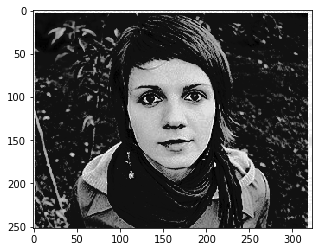

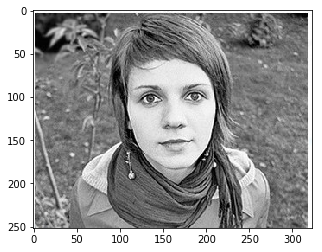

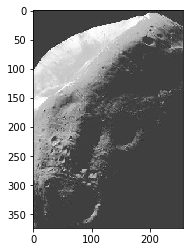

In [5]:
def HistogramMatching(im_s, im_t):
    im_s = im_s if len(im_s.shape) == 2 else im_s[:,:,0]
    im_t = im_t if len(im_t.shape) == 2 else im_t[:,:,0]
    
    freqs = [0 for _ in range(256)]
    for i in range(im_s.shape[0]):
        for j in range(im_s.shape[1]):
            freqs[im_s[i, j]] += 1
    total_pixels = sum(freqs)
    p_s = [(freq * 1.)/total_pixels for freq in freqs]
    
    cumul_p_s = [sum(p_s[:(i + 1)]) for i in range(len(p_s))]
    
    p_t = normalizedHist(im_t)
    
    freqs = [0 for _ in range(256)]
    for i in range(im_t.shape[0]):
        for j in range(im_t.shape[1]):
            freqs[im_t[i, j]] += 1
    total_pixels = sum(freqs)
    p_t = [(freq * 1.)/total_pixels for freq in freqs]
    
    cumul_p_t = [sum(p_t[:(i + 1)]) for i in range(len(p_t))]
    
    trans = np.interp(cumul_p_s, cumul_p_t, range(256))
    new_im = np.zeros(im_s.shape, dtype=np.uint8)
    for i in range(im_s.shape[0]):
        for j in range(im_s.shape[1]):
            new_im[i, j] = int(math.floor(trans[im_s[i, j]]))
            
    return new_im

im1 = io.imread('./A1_resources/Q5/hist-match-1.jpg')
im2 = io.imread('./A1_resources/Q5/hist-match-2.jpg')
new_im = HistogramMatching(im1, im2)
plt.figure()
plt.imshow(new_im, cmap="gray")

plt.figure()
plt.imshow(im1)

plt.figure()
plt.imshow(im2)

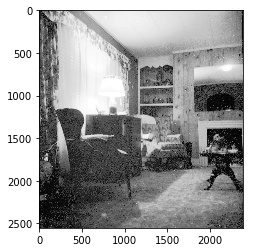

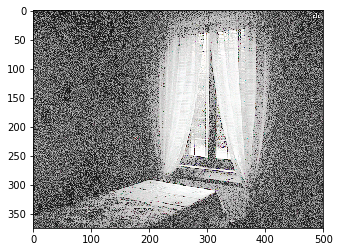

In [6]:
temp1 = io.imread('./A1_resources/Q5/hist_equal.jpg')
temp1 = exposure.equalize_hist(temp1)
plt.figure()
plt.imshow(temp1, cmap="gray")

temp2 = io.imread('./A1_resources/Q5/hist_equal2.jpg')
temp2 = exposure.equalize_hist(temp2)
plt.figure()
plt.imshow(temp2, cmap="gray")

Observations:  
Comparison with exposure.equalize_hist function: Both look the same.